 ### Read the DATA from the csv file  and import necessary libs.

In [28]:
import pywt
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import nan
from pandas import read_csv
from numpy import nan
from pandas import read_csv
from sklearn import preprocessing

dataset = read_csv('/kaggle/input/household-electricity-usage-data/2022-Sep_HT5_merged_data.csv', header=0  )
dataset.head()

,Freq,Ia,Ib,Ic,PF,UpdateTime,Va,Vb,Vc,kPt,...,kWh+,kWh-,kWh_abs,kWh_net,?IA,?IB,?IC,?VA,?VB,?VC
0,60.0,2.2,2.0,2.6,0.66,01-09-2022 00:00,6792,6688,6820,32,...,309786,0,309788,309784,326.30,66.15,192.78,0,120.31,240.38
1,60.0,2.2,2.2,2.6,0.67,01-09-2022 00:00,6776,6667,6800,32,...,309786,0,309788,309784,324.46,66.15,192.69,0,120.31,240.30
2,59.9,2.2,2.2,2.8,0.69,01-09-2022 00:01,6769,6649,6796,34,...,309786,0,309788,309786,324.46,69.14,195.46,0,120.48,240.46
3,59.9,2.2,2.2,2.8,0.68,01-09-2022 00:01,6768,6653,6796,34,...,309788,0,309788,309786,321.34,69.06,195.46,0,120.40,240.46
4,60.0,2.2,2.2,2.8,0.70,01-09-2022 00:02,6765,6646,6790,34,...,309788,0,309790,309786,322.69,68.97,195.38,0,120.31,240.38


### Visualize Three Phase Voltage

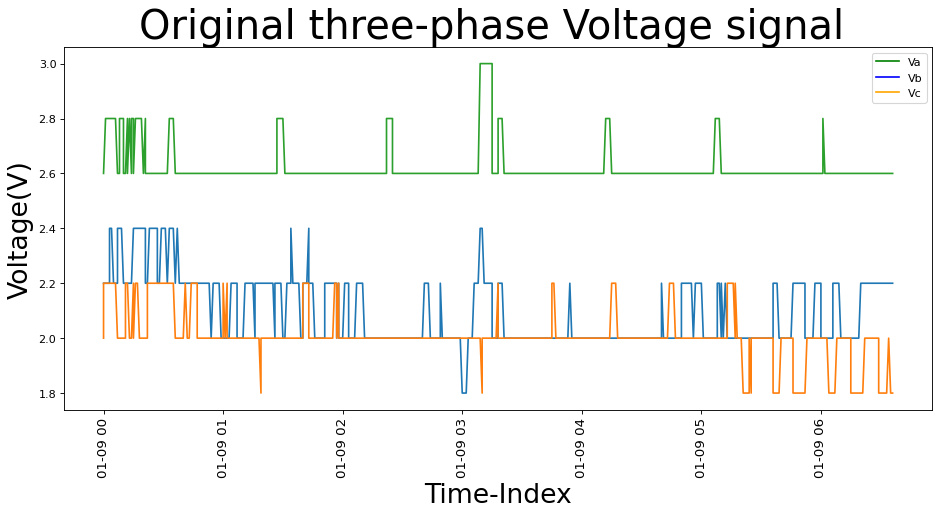

In [29]:
dataset = read_csv('/kaggle/input/household-electricity-usage-data/2022-Sep_HT5_merged_data.csv', header=0, infer_datetime_format=True, parse_dates=['UpdateTime'], index_col=['UpdateTime'])
dataset = dataset[['Ia','Ib','Ic']][:700]
from pandas import read_csv
from matplotlib import pyplot
pyplot.figure(figsize=(14, 6), dpi=80)
pyplot.plot(dataset)
pyplot.xlabel('Time-Index',size=24)
pyplot.ylabel('Voltage(V)',size=24)
pyplot.title('Original three-phase Voltage signal ',size=36)

import matplotlib.lines as mlines
import matplotlib.pyplot as plt
# defining legend style and data
Va_line = mlines.Line2D([], [], color='green', label='Va')
Vb_line = mlines.Line2D([], [], color='blue', label='Vb')
Vc_line = mlines.Line2D([], [], color='orange', label='Vc')
plt.legend(handles=[Va_line,Vb_line,Vc_line])

pyplot.xticks(rotation = 90 , size=12)
pyplot.show()

### Visualize Three Phase current

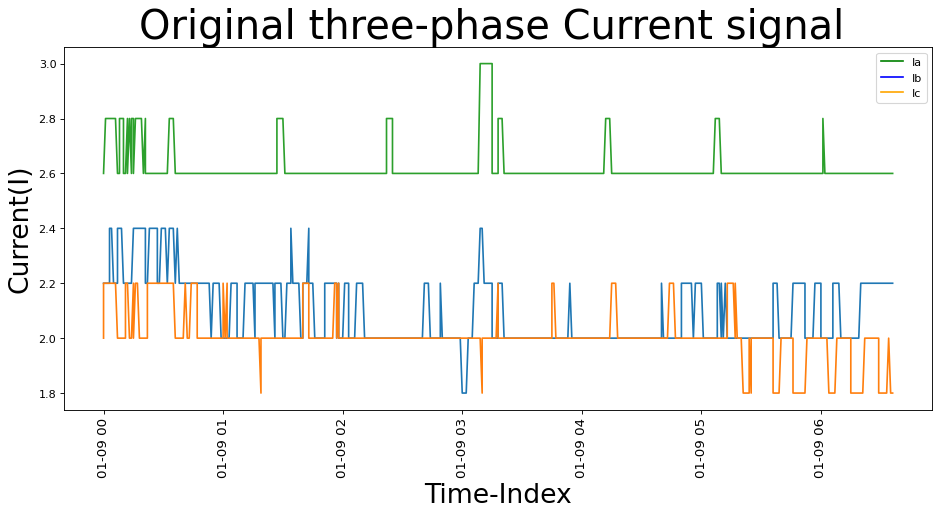

In [30]:
dataset = read_csv('/kaggle/input/household-electricity-usage-data/2022-Sep_HT5_merged_data.csv', header=0, infer_datetime_format=True, parse_dates=['UpdateTime'], index_col=['UpdateTime'])
dataset = dataset[['Ia','Ib','Ic']][:700]

from pandas import read_csv
from matplotlib import pyplot
pyplot.figure(figsize=(14, 6), dpi=80)
pyplot.plot(dataset)
pyplot.xlabel('Time-Index',size=24)
pyplot.ylabel('Current(I)',size=24)
pyplot.title('Original three-phase Current signal ',size=36)

import matplotlib.lines as mlines
import matplotlib.pyplot as plt
# defining legend style and data
Va_line = mlines.Line2D([], [], color='green', label='Ia')
Vb_line = mlines.Line2D([], [], color='blue', label='Ib')
Vc_line = mlines.Line2D([], [], color='orange', label='Ic')
plt.legend(handles=[Va_line,Vb_line,Vc_line])
pyplot.xticks(rotation = 90 , size=12)
pyplot.show()

###  Discrete Wavelet Transform 

Perform DWT on the data and visulazie the Approximation and detailed series 

* Haar 
* Daubechies 
* Biorthogonal

### HAAR ,  Daubechies  , Biorthogonal and Reverse Biorthogonal

In [31]:
pywt.wavelist('bior')

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8']

UpdateTime
2022-01-09 00:00:00    60.0
2022-01-09 00:00:00    60.0
2022-01-09 00:01:00    59.9
2022-01-09 00:01:00    59.9
2022-01-09 00:02:00    60.0
                       ... 
2022-09-30 23:57:00    59.9
2022-09-30 23:57:00    59.9
2022-09-30 23:58:00    60.0
2022-09-30 23:58:00    60.0
2022-09-30 23:59:00    60.0
Name: Freq, Length: 76966, dtype: float64


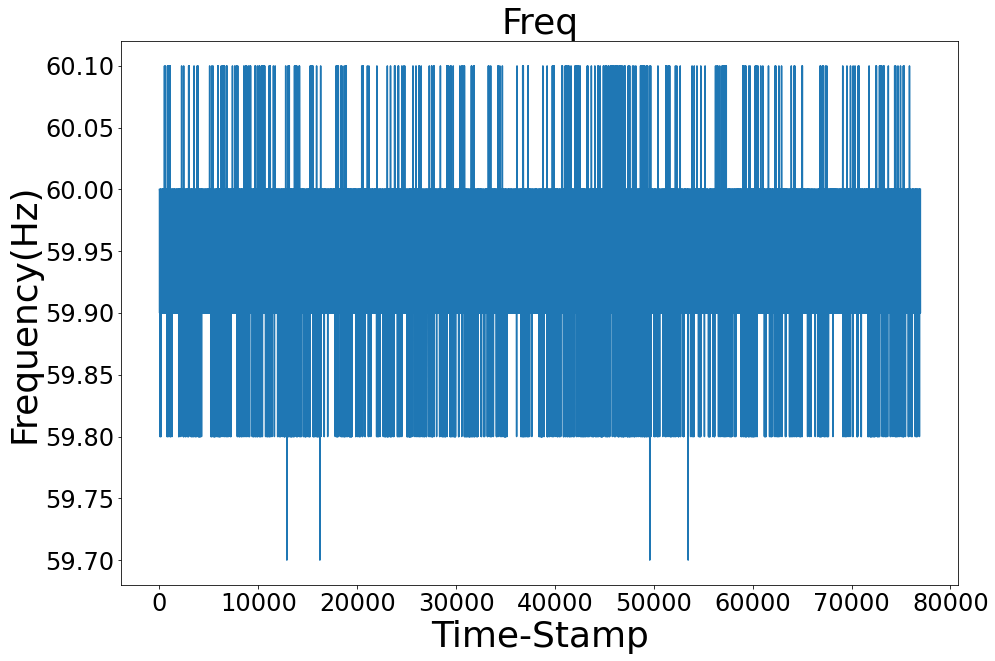

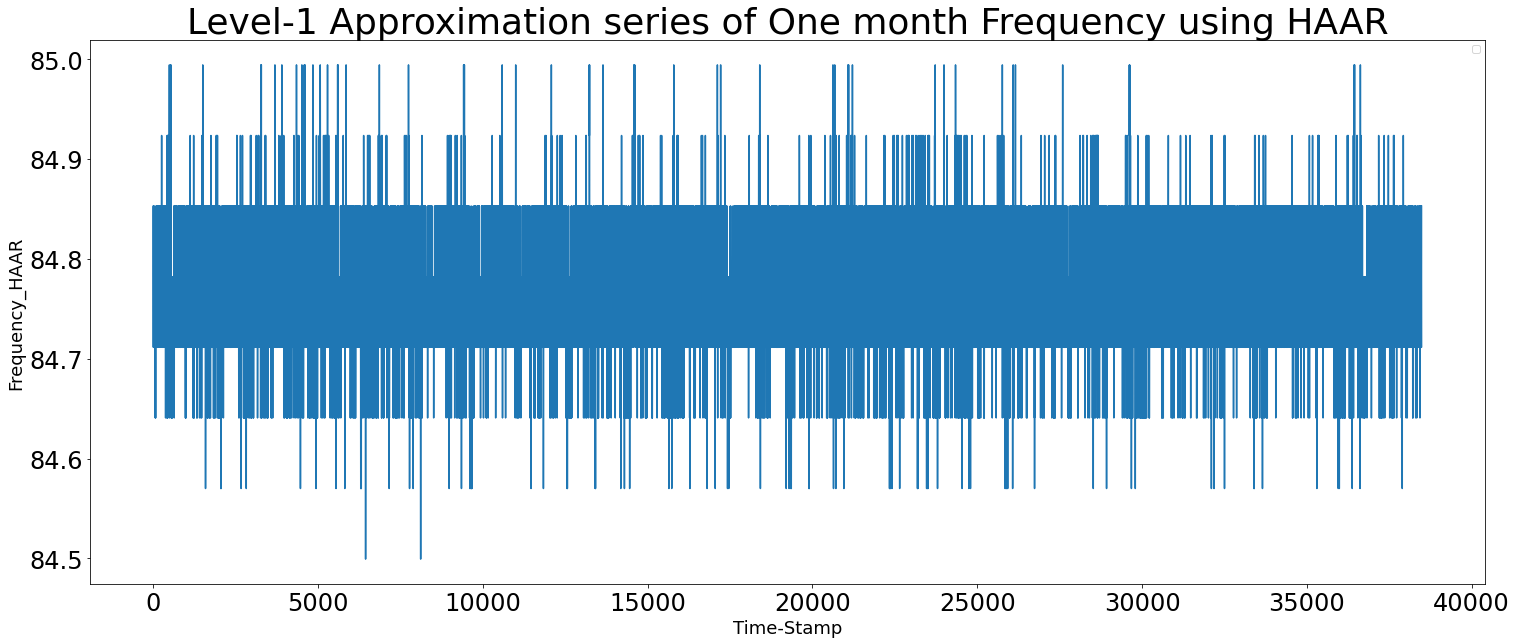

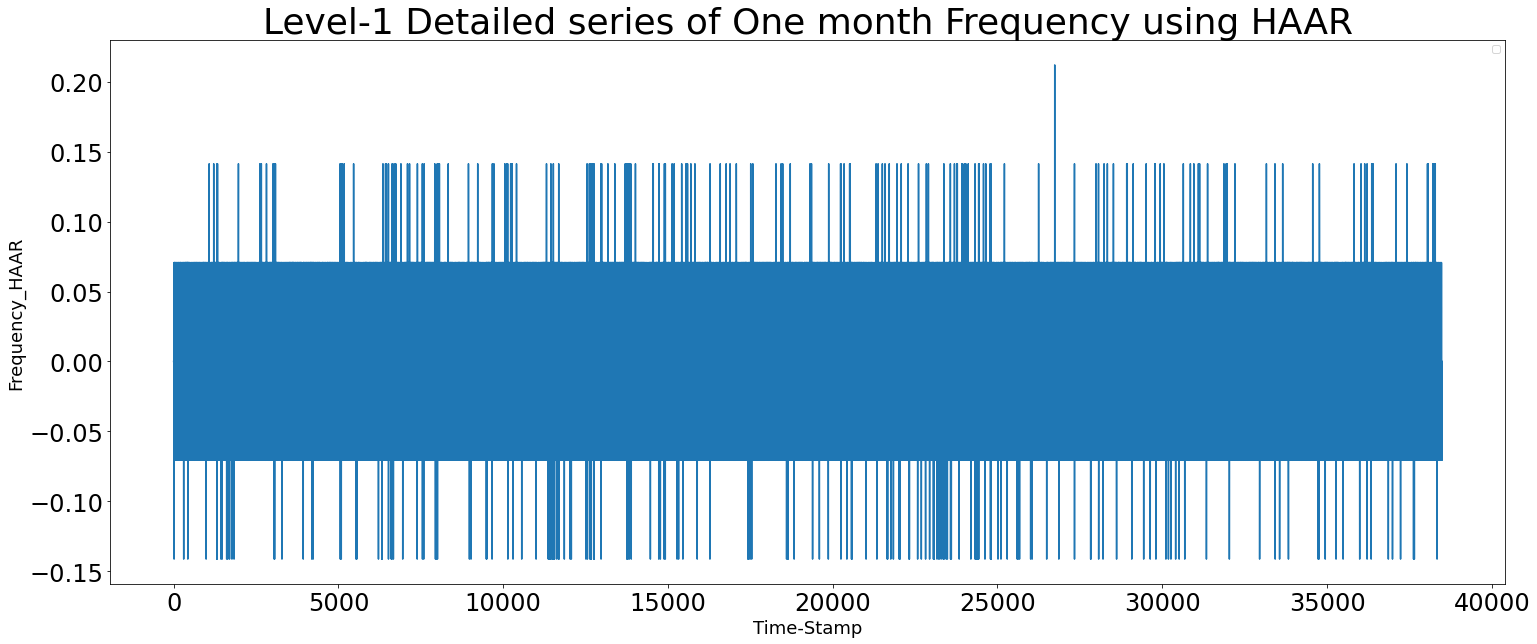

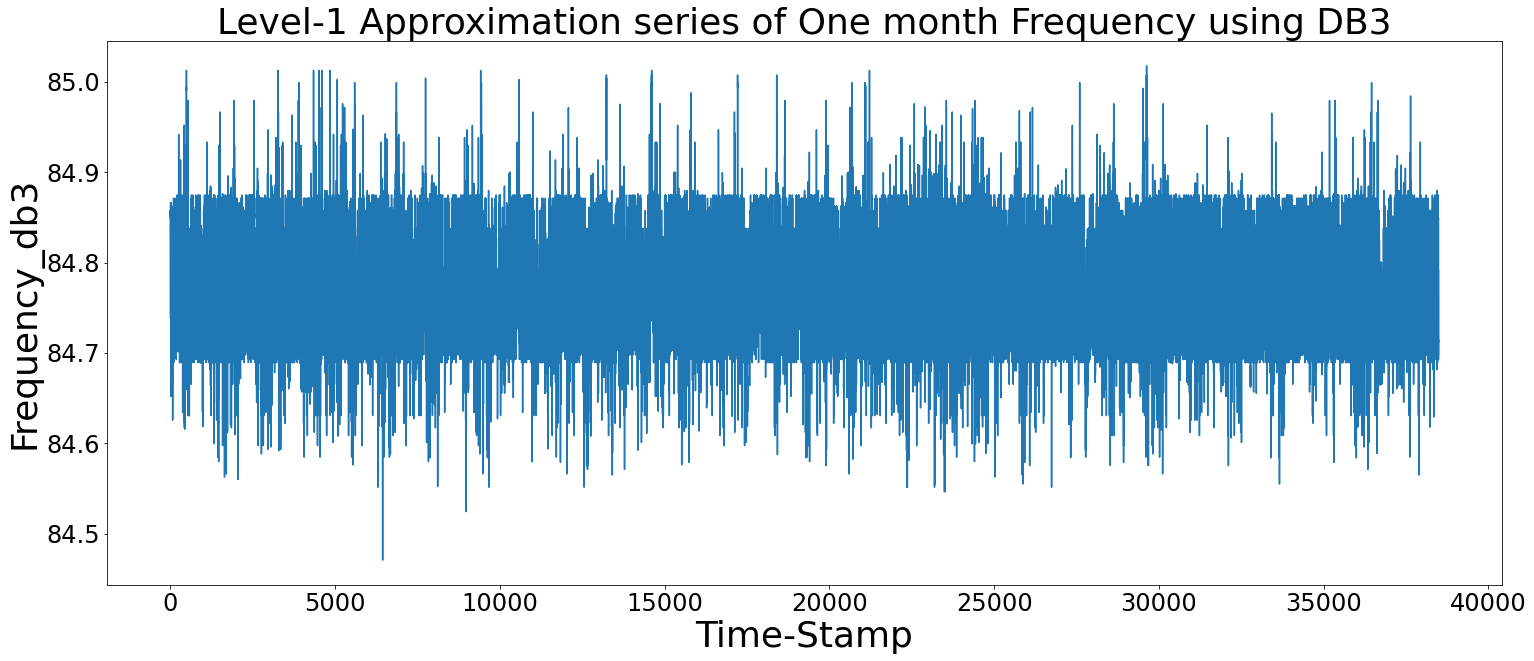

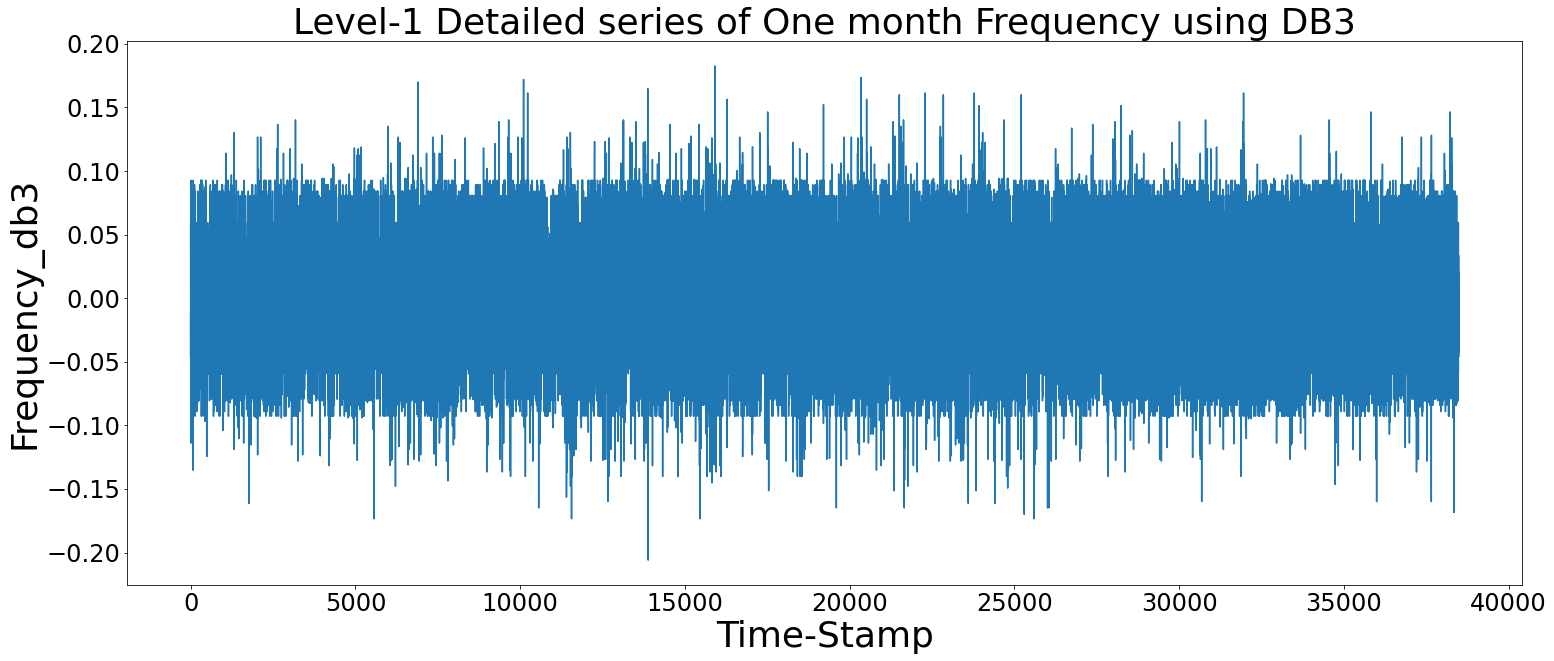

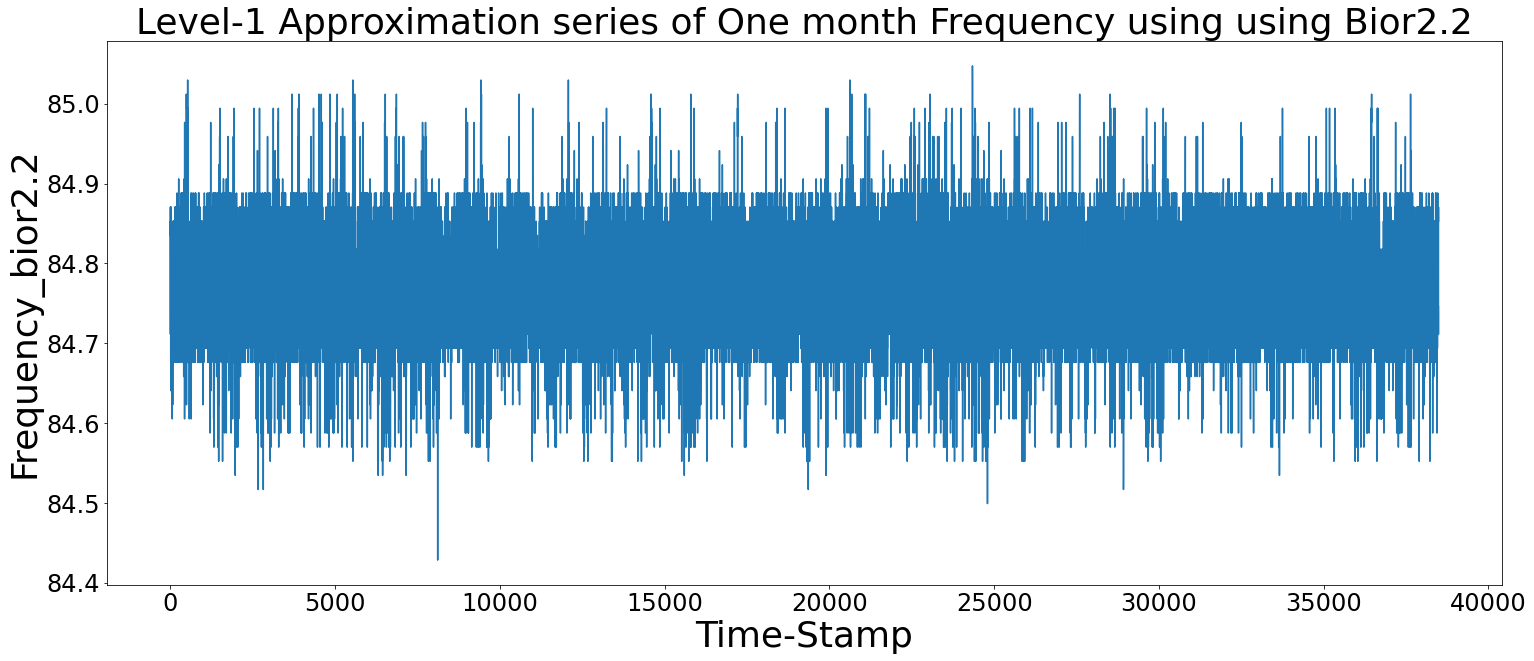

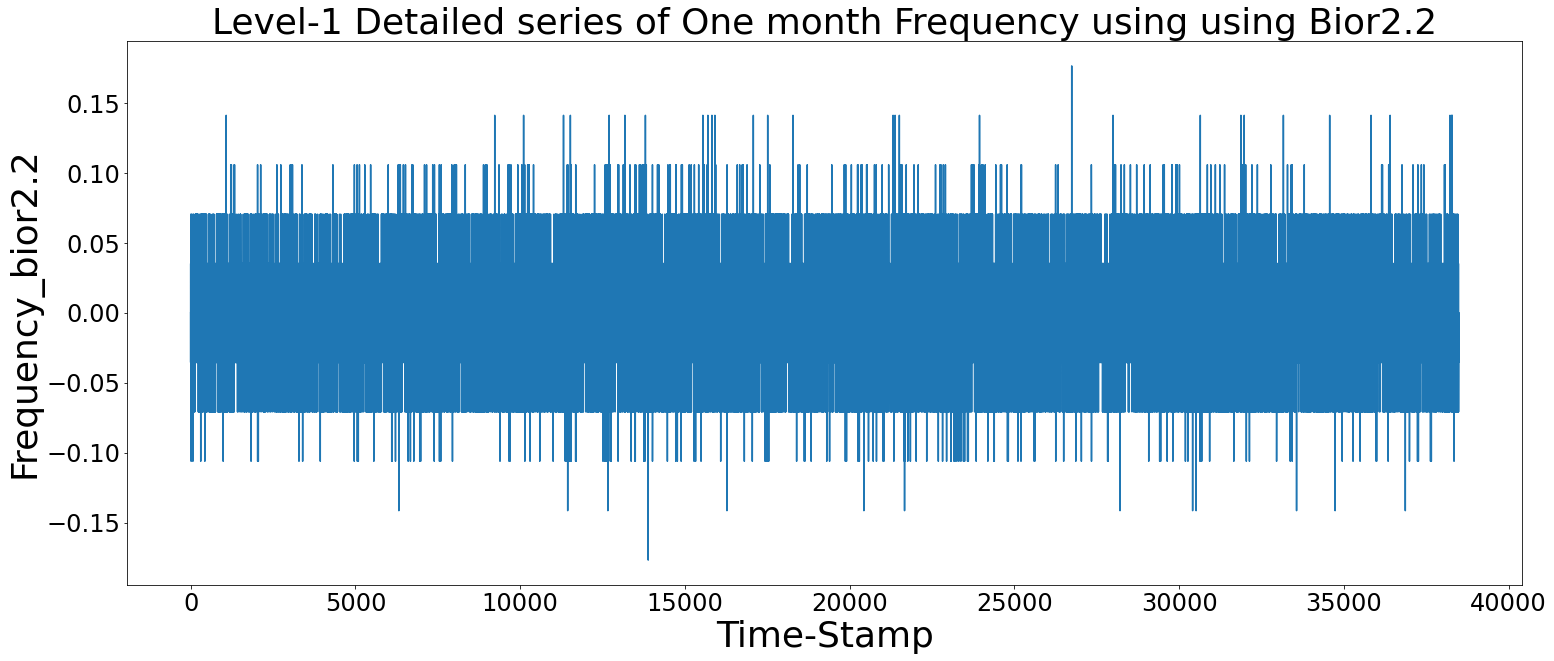

In [32]:
import pywt

dataset = read_csv('/kaggle/input/household-electricity-usage-data/2022-Sep_HT5_merged_data.csv', header=0, infer_datetime_format=True, parse_dates=['UpdateTime'], index_col=['UpdateTime'])
Freq=dataset["Freq"]
print(Freq)
plt.figure(figsize=(15, 10))
plt.plot(range(len(Freq)),Freq)
plt.title('Freq', size=36)
plt.xlabel('Time-Stamp', fontsize=36)
plt.ylabel('Frequency(Hz)', fontsize=36)
plt.yticks(fontsize=24,)
plt.xticks(fontsize=24,)
plt.savefig("feq_og.jpg")
plt.show()

(cA_haar, cD_haar) = pywt.dwt(Freq, 'haar')

plt.figure(figsize=(25, 10))
x = range(len(cA_haar))
plt.plot(x,cA_haar)
plt.legend()
plt.title('Level-1 Approximation series of One month Frequency using HAAR', size=36)
plt.xlabel('Time-Stamp', fontsize=18)
plt.ylabel('Frequency_HAAR', fontsize=18)
plt.yticks(fontsize=24,)
plt.xticks(fontsize=24,)
plt.savefig("approximation_feq_haar.jpg")
plt.show()

plt.figure(figsize=(25, 10))
x = range(len(cD_haar))
plt.plot(x,cD_haar)
plt.legend()
plt.title('Level-1 Detailed series of One month Frequency using HAAR', size=36)
plt.xlabel('Time-Stamp', fontsize=18)
plt.ylabel('Frequency_HAAR', fontsize=18)
plt.yticks(fontsize=24,)
plt.xticks(fontsize=24,)
plt.savefig("feq_haar.jpg")
plt.show()

##  Daubechies 
cA_db , cD_db = pywt.dwt(Freq, 'db3')


plt.figure(figsize=(25, 10))
plt.plot(range(len(cA_db)),cA_db)
plt.title('Level-1 Approximation series of One month Frequency using DB3', size=36)
plt.xlabel('Time-Stamp', fontsize=36)
plt.ylabel('Frequency_db3', fontsize=36)
plt.yticks(fontsize=24,)
plt.xticks(fontsize=24,)
plt.savefig("Approximation_freq_db.jpg")
plt.show()

plt.figure(figsize=(25, 10))
plt.plot(range(len(cD_db)),cD_db)
plt.title('Level-1 Detailed series of One month Frequency using DB3', size=36)
plt.xlabel('Time-Stamp', fontsize=36)
plt.ylabel('Frequency_db3', fontsize=36)
plt.yticks(fontsize=24,)
plt.xticks(fontsize=24,)
plt.savefig("freq_db.jpg")
plt.show()
##  bi-orthogonal
cA_bior , cD_bior = pywt.dwt(Freq, 'bior2.2')

plt.figure(figsize=(25, 10))
plt.plot(range(len(cA_bior)),cA_bior)
plt.title('Level-1 Approximation series of One month Frequency using using Bior2.2', size=36)
plt.xlabel('Time-Stamp', fontsize=36)
plt.ylabel('Frequency_bior2.2', fontsize=36)
plt.yticks(fontsize=24,)
plt.xticks(fontsize=24,)
plt.savefig("Approximation_freq_bior.jpg")
plt.show()

plt.figure(figsize=(25, 10))
plt.plot(range(len(cD_bior)),cD_bior)
plt.title('Level-1 Detailed series of One month Frequency using using Bior2.2', size=36)
plt.xlabel('Time-Stamp', fontsize=36)
plt.ylabel('Frequency_bior2.2', fontsize=36)
plt.yticks(fontsize=24,)
plt.xticks(fontsize=24,)
plt.savefig("freq_bior.jpg")
plt.show()

FreqWavelet_approx_haar = cA_haar
FreqWavelet_approx_db = cA_db
FreqWavelet_approx_bior = cA_bior

FreqWavelet_Detail_haar = cD_haar
FreqWavelet_Detail_db = cD_db
FreqWavelet_Detail_bior = cD_bior

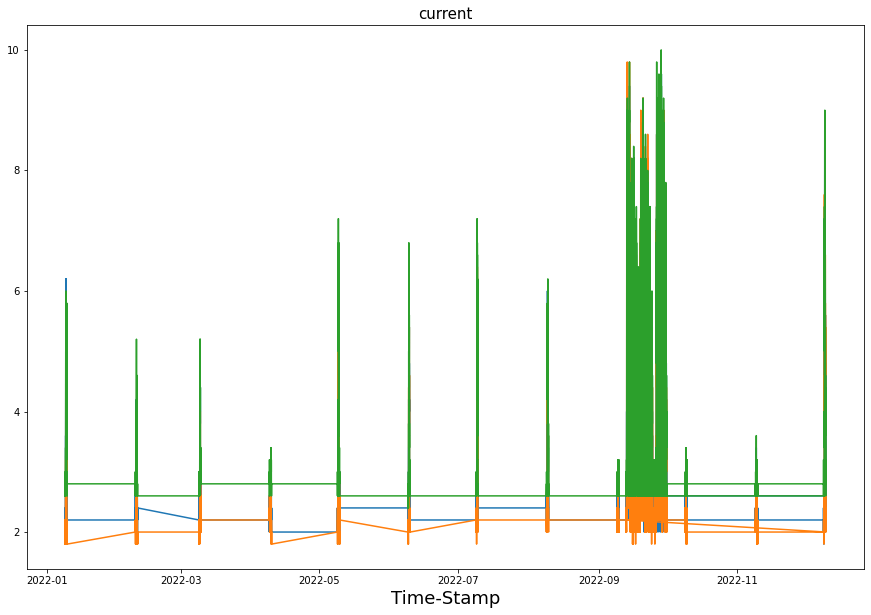

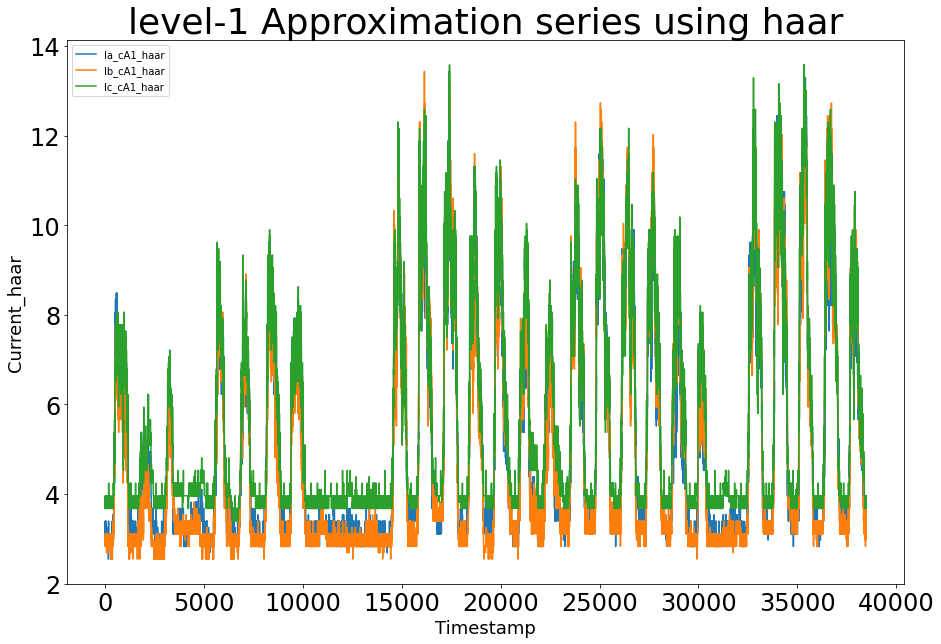

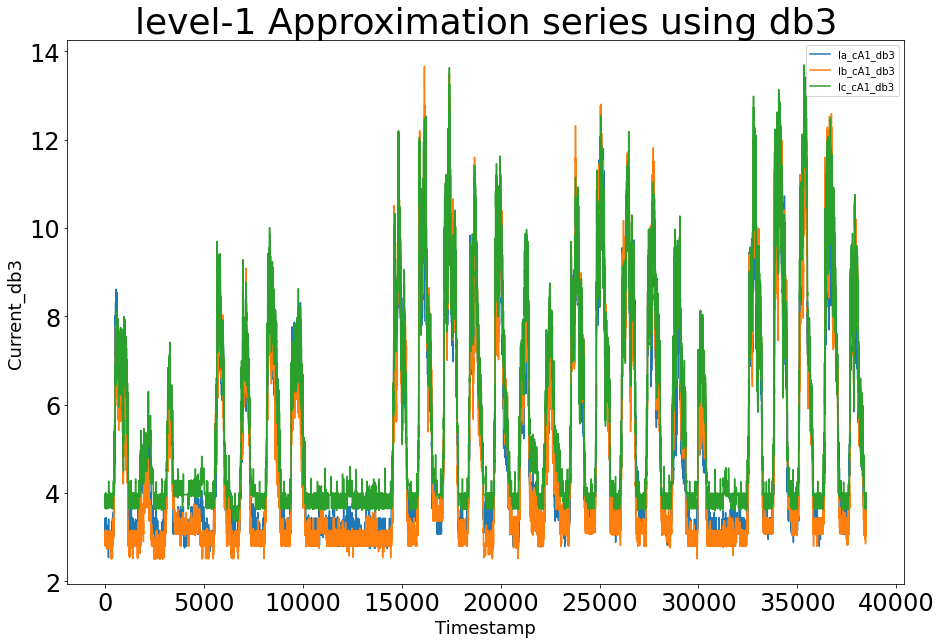

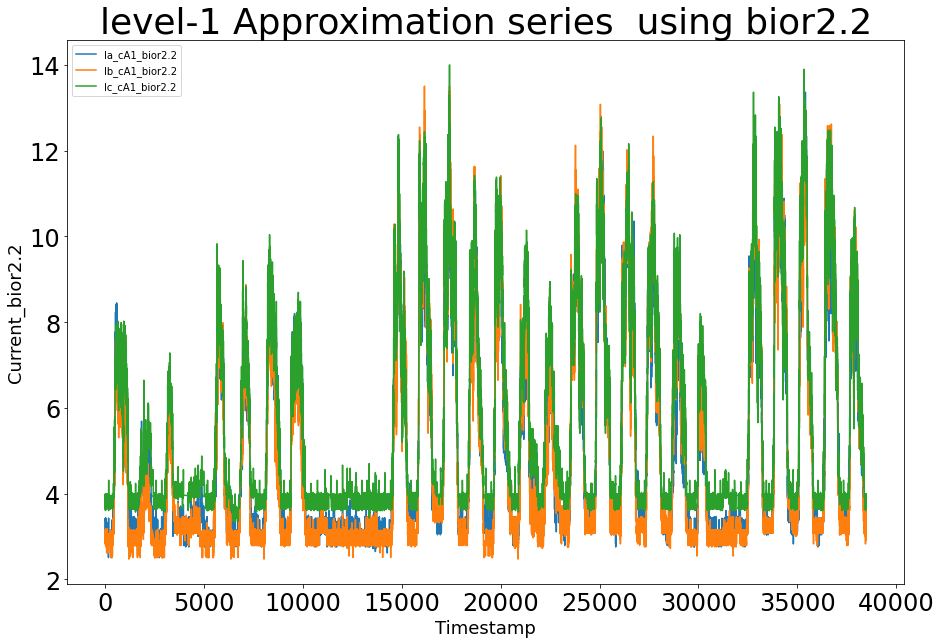

In [33]:
Ia=dataset["Ia"]
Ib=dataset["Ib"]
Ic=dataset["Ic"]



plt.figure(figsize=(15, 10))
plt.plot(Ia, label = "Ia")
plt.plot(Ib, label = "Ib")
plt.plot(Ic, label = "Ic")

plt.title('current', size=15)
plt.xlabel('Time-Stamp', fontsize=18)
plt.show()

Ia_cA_haar, Ia_cD_haar = pywt.dwt(Ia, 'haar')
Ib_cA_haar, Ib_cD_haar = pywt.dwt(Ib, 'haar')
Ic_cA_haar, Ic_cD_haar = pywt.dwt(Ic, 'haar')




plt.figure(figsize=(15, 10))
plt.plot(range(len(Ia_cA_haar)),Ia_cA_haar, label = "Ia_cA1_haar")
plt.plot(range(len(Ib_cA_haar)),Ib_cA_haar, label = "Ib_cA1_haar")
plt.plot(range(len(Ic_cA_haar)),Ic_cA_haar, label = "Ic_cA1_haar")
plt.title('level-1 Approximation series using haar', size=36)
plt.ylabel('Current_haar', fontsize=18)
plt.xlabel('Timestamp', fontsize=18)
plt.yticks(fontsize=24,)
plt.xticks(fontsize=24,)
plt.legend()
plt.savefig("current_haar.jpg")
plt.show()


Ia_cA_db, Ia_cD_db = pywt.dwt(Ia, 'db3')
Ib_cA_db, Ib_cD_db = pywt.dwt(Ib, 'db3')
Ic_cA_db, Ic_cD_db = pywt.dwt(Ic, 'db3')

plt.figure(figsize=(15, 10))
plt.plot(range(len(Ia_cA_db)),Ia_cA_db, label = "Ia_cA1_db3")
plt.plot(range(len(Ib_cA_db)),Ib_cA_db, label = "Ib_cA1_db3")
plt.plot(range(len(Ic_cA_db)),Ic_cA_db, label = "Ic_cA1_db3")
plt.title('level-1 Approximation series using db3', size=36)
plt.ylabel('Current_db3', fontsize=18)
plt.xlabel('Timestamp', fontsize=18)
plt.yticks(fontsize=24,)
plt.xticks(fontsize=24,)
plt.legend()
plt.savefig("current_db.jpg")
plt.show()

Ia_cA_bior, Ia_cD_bior = pywt.dwt(Ia, 'bior2.2')
Ib_cA_bior, Ib_cD_bior = pywt.dwt(Ib, 'bior2.2')
Ic_cA_bior, Ic_cD_bior = pywt.dwt(Ic, 'bior2.2')

plt.figure(figsize=(15, 10))
plt.plot(range(len(Ia_cA_bior)),Ia_cA_bior, label = "Ia_cA1_bior2.2")
plt.plot(range(len(Ib_cA_bior)),Ib_cA_bior, label = "Ib_cA1_bior2.2")
plt.plot(range(len(Ic_cA_bior)),Ic_cA_bior, label = "Ic_cA1_bior2.2")
plt.title('level-1 Approximation series  using bior2.2', size=36)
plt.ylabel('Current_bior2.2', fontsize=18)
plt.xlabel('Timestamp', fontsize=18)
plt.yticks(fontsize=24,)
plt.xticks(fontsize=24,)
plt.legend()
plt.savefig("current_bior.jpg")
plt.show()

76966


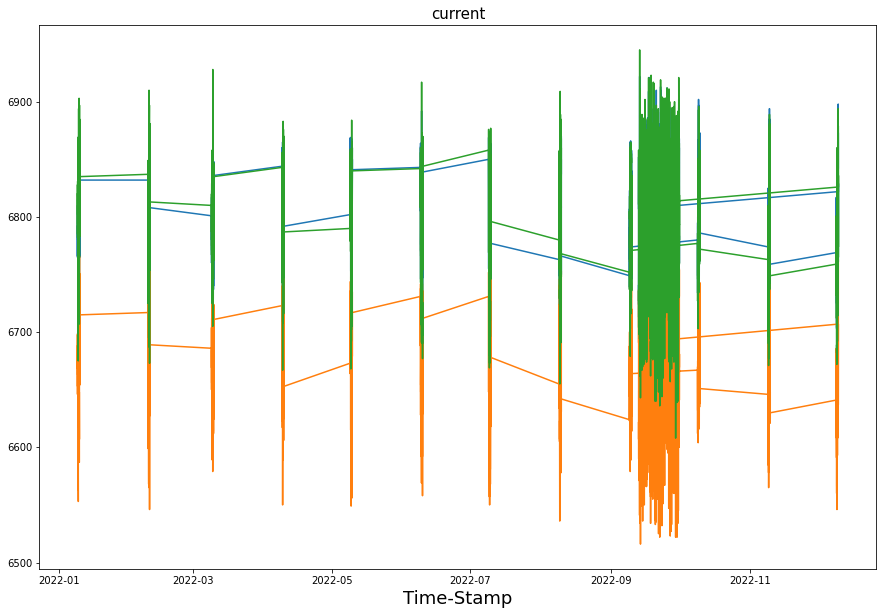

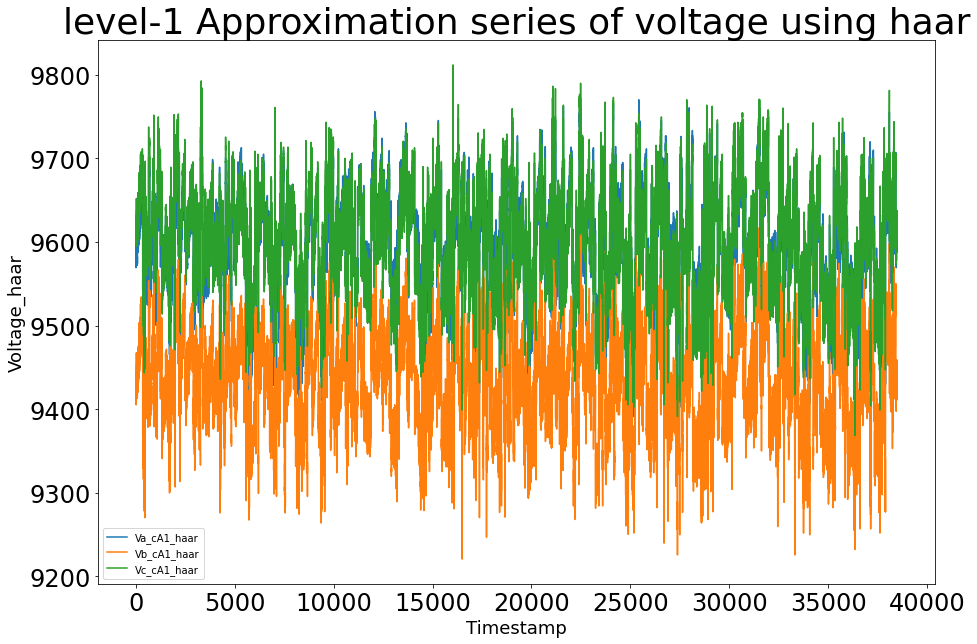

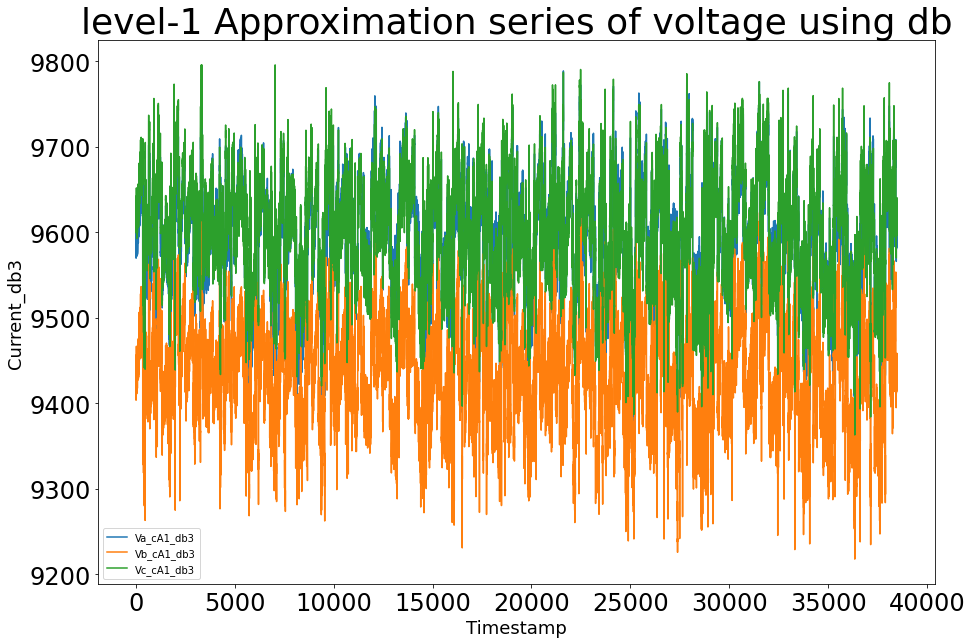

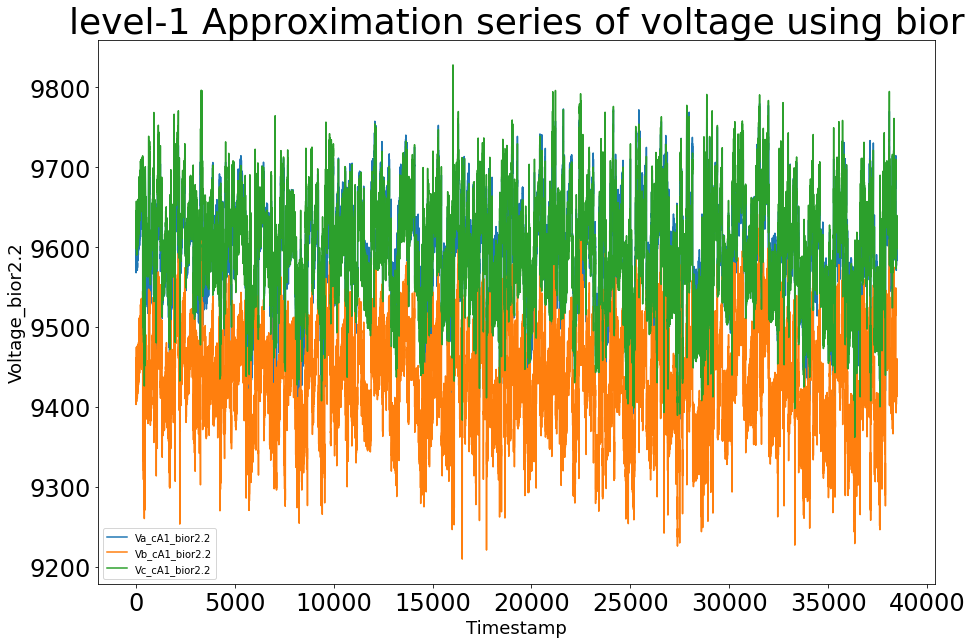

In [34]:
Va=dataset["Va"]
Vb=dataset["Vb"]
Vc=dataset["Vc"]

print(len(Ia))


plt.figure(figsize=(15, 10))
plt.plot(Va, label = "Va")
plt.plot(Vb, label = "Vb")
plt.plot(Vc, label = "Vc")

plt.title('current', size=15)
plt.xlabel('Time-Stamp', fontsize=18)
plt.show()

Va_cA_haar, Va_cD_haar = pywt.dwt(Va, 'haar')
Vb_cA_haar, Vb_cD_haar = pywt.dwt(Vb, 'haar')
Vc_cA_haar, Vc_cD_haar = pywt.dwt(Vc, 'haar')


plt.figure(figsize=(15, 10))
plt.plot(range(len(Va_cA_haar)),Va_cA_haar, label = "Va_cA1_haar")
plt.plot(range(len(Vb_cA_haar)),Vb_cA_haar, label = "Vb_cA1_haar")
plt.plot(range(len(Vc_cA_haar)),Vc_cA_haar, label = "Vc_cA1_haar")
plt.title('level-1 Approximation series of voltage using haar', size=36)
plt.savefig("voltage_haar.jpg")
plt.ylabel('Voltage_haar', fontsize=18)
plt.xlabel('Timestamp', fontsize=18)
plt.yticks(fontsize=24,)
plt.xticks(fontsize=24,)
plt.legend()
plt.show()


Va_cA_db, Va_cD_db = pywt.dwt(Va, 'db3')
Vb_cA_db, Vb_cD_db = pywt.dwt(Vb, 'db3')
Vc_cA_db, Vc_cD_db = pywt.dwt(Vc, 'db3')

plt.figure(figsize=(15, 10))
plt.plot(range(len(Va_cA_db)),Va_cA_db, label = "Va_cA1_db3")
plt.plot(range(len(Va_cA_db)),Vb_cA_db, label = "Vb_cA1_db3")
plt.plot(range(len(Va_cA_db)),Vc_cA_db, label = "Vc_cA1_db3")
plt.title('level-1 Approximation series of voltage using db', size=36)
plt.savefig("voltage_db3.jpg")
plt.ylabel('Current_db3', fontsize=18)
plt.xlabel('Timestamp', fontsize=18)
plt.yticks(fontsize=24,)
plt.xticks(fontsize=24,)
plt.legend()
plt.show()

Va_cA_bior, Va_cD_bior = pywt.dwt(Va, 'bior2.2')
Vb_cA_bior, Vb_cD_bior = pywt.dwt(Vb, 'bior2.2')
Vc_cA_bior, Vc_cD_bior = pywt.dwt(Vc, 'bior2.2')

plt.figure(figsize=(15, 10))
plt.plot(range(len(Va_cA_bior)),Va_cA_bior, label = "Va_cA1_bior2.2")
plt.plot(range(len(Va_cA_bior)),Vb_cA_bior, label = "Vb_cA1_bior2.2")
plt.plot(range(len(Va_cA_bior)),Vc_cA_bior, label = "Vc_cA1_bior2.2")
plt.title('level-1 Approximation series of voltage using bior', size=36)
plt.savefig("voltage_bior2.2.jpg")
plt.ylabel('Voltage_bior2.2', fontsize=18)
plt.xlabel('Timestamp', fontsize=18)
plt.yticks(fontsize=24,)
plt.xticks(fontsize=24,)
plt.legend()
plt.show()

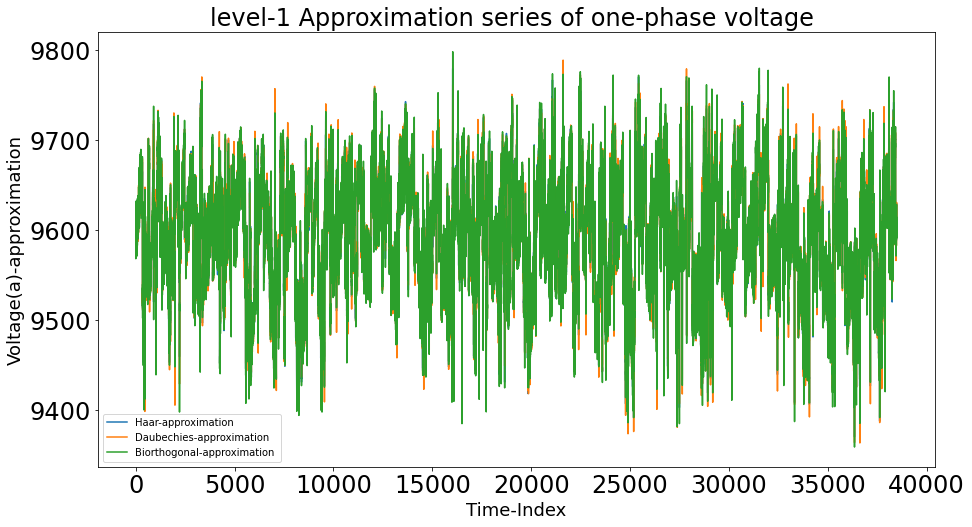

In [35]:
import pywt
dataset = read_csv('/kaggle/input/household-electricity-usage-data/2022-Sep_HT5_merged_data.csv', header=0, infer_datetime_format=True, parse_dates=['UpdateTime'], index_col=['UpdateTime'])
dataset = dataset['Va'][:700]


Va_cA_haar, Va_cD_haar = pywt.dwt(Va, 'haar')
Va_cA_db, Va_cD_db = pywt.dwt(Va, 'db3')
Va_cA_bior, Va_cD_bior = pywt.dwt(Va, 'bior2.2')


plt.figure(figsize=(15, 8))
plt.plot(range(len(Va_cA_haar)),Va_cA_haar, label = "Haar-approximation")
plt.plot(range(len(Va_cA_db)),Va_cA_db, label = "Daubechies-approximation")
plt.plot(range(len(Va_cA_bior)),Va_cA_bior, label = "Biorthogonal-approximation ")
plt.title('level-1 Approximation series of one-phase voltage ', size=24)
plt.savefig("voltage_haar.jpg")
plt.ylabel('Voltage(a)-approximation', fontsize=18)
plt.xlabel('Time-Index', fontsize=18)
plt.yticks(fontsize=24,)
plt.xticks(fontsize=24,)
plt.legend()
plt.show()

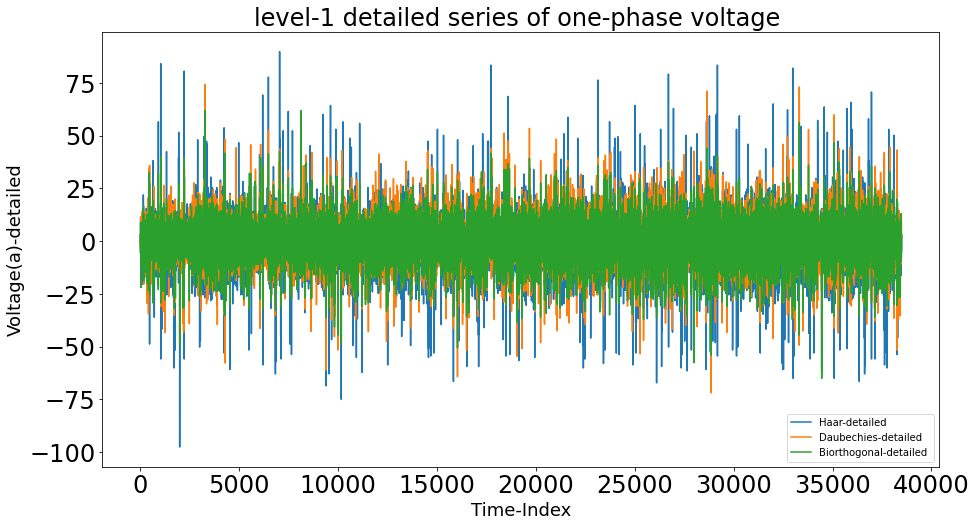

In [36]:
import pywt
dataset = read_csv('/kaggle/input/household-electricity-usage-data/2022-Sep_HT5_merged_data.csv', header=0, infer_datetime_format=True, parse_dates=['UpdateTime'], index_col=['UpdateTime'])
dataset = dataset['Va'][:700]


Va_cA_haar, Va_cD_haar = pywt.dwt(Va, 'haar')
Va_cA_db, Va_cD_db = pywt.dwt(Va, 'db3')
Va_cA_bior, Va_cD_bior = pywt.dwt(Va, 'bior2.2')


plt.figure(figsize=(15, 8))
plt.plot(range(len(Va_cD_haar)),Va_cD_haar, label = "Haar-detailed")
plt.plot(range(len(Va_cD_db)),Va_cD_db, label = "Daubechies-detailed")
plt.plot(range(len(Va_cD_bior)),Va_cD_bior, label = "Biorthogonal-detailed ")
plt.title('level-1 detailed series of one-phase voltage ', size=24)
plt.savefig("voltage_haar.jpg")
plt.ylabel('Voltage(a)-detailed', fontsize=18)
plt.xlabel('Time-Index', fontsize=18)
plt.yticks(fontsize=24,)
plt.xticks(fontsize=24,)
plt.legend()
plt.show()

### Reformat the data to feed the DWT data into neural network 

In [37]:
Sept_long_term_haar= pd.DataFrame({"Freq" : FreqWavelet_approx_haar , "Ia_cA" : Ia_cA_haar, "Ib_cA" : Ib_cA_haar ,"Ic_cA" : Ic_cA_haar,"Va_cA" : Va_cA_haar ,"Vb_cA" : Vb_cA_haar ,"Vc_cA" : Vc_cA_haar  })
print(Sept_long_term_haar)
Sept_long_term_haar.to_csv("Sept_long_term_haar.csv", index=False)


            Freq     Ia_cA     Ib_cA     Ic_cA        Va_cA        Vb_cA  \
0      84.852814  3.111270  2.969848  3.676955  9594.024807  9443.411063   
1      84.711392  3.111270  3.111270  3.959798  9572.104497  9405.934403   
2      84.852814  3.111270  3.111270  3.959798  9569.276070  9406.641510   
3      84.852814  3.394113  3.111270  3.959798  9572.104497  9413.712578   
4      84.852814  3.252691  3.111270  3.959798  9575.640031  9422.197859   
...          ...       ...       ...       ...          ...          ...   
38478  84.711392  3.394113  3.394113  3.676955  9629.380146  9451.189237   
38479  84.711392  3.394113  3.111270  3.676955  9624.430399  9456.138985   
38480  84.711392  3.394113  3.111270  3.818377  9615.238011  9458.967412   
38481  84.782103  3.394113  3.394113  3.959798  9612.409583  9449.067917   
38482  84.852814  3.394113  3.394113  3.818377  9595.439021  9434.925781   

             Vc_cA  
0      9630.794360  
1      9610.995370  
2      9604.631409  
3  

haar-month-approx

In [38]:
Sept_long_term_haar_detail = pd.DataFrame({"Freq" : FreqWavelet_Detail_haar , "Ia_cD" : Ia_cD_haar, "Ib_cD" : Ib_cD_haar ,"Ic_cD" : Ic_cD_haar,"Va_cD" : Va_cD_haar ,"Vb_cA" : Vb_cD_haar ,"Vc_cD" : Vc_cD_haar  })
print(Sept_long_term_haar_detail)
Sept_long_term_haar_detail.to_csv("Sept_long_term_haar_detail.csv", index=False)

           Freq     Ia_cD     Ib_cD     Ic_cD      Va_cD      Vb_cA      Vc_cD
0      0.000000  0.000000 -0.141421  0.000000  11.313708  14.849242  14.142136
1      0.000000  0.000000  0.000000  0.000000   0.707107  -2.828427   0.000000
2      0.000000  0.000000  0.000000  0.000000  -2.121320  -7.778175  -2.121320
3      0.000000  0.000000  0.000000  0.000000   0.707107  -0.707107   2.121320
4      0.000000  0.141421  0.000000  0.000000  -5.656854   0.707107   0.707107
...         ...       ...       ...       ...        ...        ...        ...
38478  0.000000  0.000000  0.000000  0.000000  -4.242641 -14.142136  -5.656854
38479  0.000000  0.000000  0.000000  0.000000   0.707107  -3.535534   1.414214
38480  0.000000  0.000000  0.000000 -0.141421   0.000000  -2.121320  -4.949747
38481 -0.070711  0.000000  0.000000  0.000000  -5.656854   0.707107   0.000000
38482  0.000000  0.000000  0.000000  0.141421   2.828427   2.121320   2.828427

[38483 rows x 7 columns]


db3-month-approx

In [39]:
Sept_long_term_db = pd.DataFrame({"Freq" : FreqWavelet_approx_db , "Ia_cA" : Ia_cA_db, "Ib_cA" : Ib_cA_db ,"Ic_cA" : Ic_cA_db,"Va_cA" : Va_cA_db ,"Vb_cA" : Vb_cA_db ,"Vc_cA" : Vc_cA_db  })
print(Sept_long_term_db)
Sept_long_term_db.to_csv("Sept_long_term_db.csv", index=False)

            Freq     Ia_cA     Ib_cA     Ic_cA        Va_cA        Vb_cA  \
0      84.738858  3.111270  3.155360  3.904868  9570.874257  9404.750887   
1      84.857835  3.111270  2.857916  3.666912  9603.295681  9456.208744   
2      84.820327  3.111270  3.044736  3.731886  9586.552817  9430.602265   
3      84.738858  3.101227  3.111270  3.959798  9570.264987  9403.557543   
4      84.852814  3.159155  3.111270  3.959798  9571.191281  9409.963915   
...          ...       ...       ...       ...          ...          ...   
38480  84.711392  3.394113  3.339182  3.684001  9630.465370  9455.486077   
38481  84.714915  3.394113  3.101227  3.639910  9622.991154  9457.272679   
38482  84.692870  3.394113  3.166200  3.886219  9612.670398  9458.374776   
38483  84.819547  3.394113  3.394113  4.003888  9612.441761  9447.157626   
38484  84.849291  3.394113  3.394113  3.706444  9592.215552  9432.880301   

             Vc_cA  
0      9607.684930  
1      9642.188464  
2      9622.613998  
3  

db3-month-detail

In [40]:
Sept_long_term_db_detail= pd.DataFrame({"Freq" : FreqWavelet_Detail_db , "Ia_cD" : Ia_cD_db, "Ib_cD" : Ib_cD_db ,"Ic_cD" : Ic_cD_db,"Va_cD" : Va_cD_db ,"Vb_cD" : Vb_cD_db ,"Vc_cD" : Vc_cD_db  })
print(Sept_long_term_db_detail)
Sept_long_term_db_detail.to_csv("Sept_long_term_db_detail.csv", index=False)

               Freq         Ia_cD         Ib_cD         Ic_cD     Va_cD  \
0     -1.206676e-02 -1.110223e-16 -6.940280e-02  2.413351e-02  4.672325   
1     -4.742210e-02 -1.110223e-16  9.913949e-03  9.484419e-02 -3.779992   
2      5.948885e-02 -1.110223e-16 -7.045258e-03 -2.413351e-02 -1.026724   
3     -1.206676e-02  9.484419e-02 -1.110223e-16  9.714451e-17  1.247151   
4     -4.884981e-15  4.240060e-02 -1.110223e-16  9.714451e-17 -3.376275   
...             ...           ...           ...           ...       ...   
38480 -1.332268e-15 -1.942890e-16  2.413351e-02 -6.653411e-02 -2.347022   
38481 -3.326706e-02 -1.942890e-16  9.484419e-02  2.868691e-03 -4.747458   
38482  1.434345e-03 -1.942890e-16 -2.413351e-02  5.948885e-02 -4.469658   
38483 -3.522629e-03 -1.942890e-16 -1.942890e-16 -6.940280e-02  0.019480   
38484  3.326706e-02  2.775558e-17  2.775558e-17  9.913949e-03  9.498737   

           Vb_cD     Vc_cD  
0       5.256183  6.457610  
1     -10.907624 -2.888279  
2      -4.00

In [42]:
Haar_Wavelet_Dataset_week_1 = pd.DataFrame({"Freq" : FreqWavelet_approx_haar , "Ia_cA" : Ia_cA_haar, "Ib_cA" : Ib_cA_haar ,"Ic_cA" : Ic_cA_haar,"Va_cA" : Va_cA_haar ,"Vb_cA" : Vb_cA_haar ,"Vc_cA" : Vc_cA_haar  })
print(Haar_Wavelet_Dataset_week_1 )
Haar_Wavelet_Dataset_week_1.to_csv("Haar_Wavelet_Dataset_week_1.csv", index=False)


            Freq     Ia_cA     Ib_cA     Ic_cA        Va_cA        Vb_cA  \
0      84.852814  3.111270  2.969848  3.676955  9594.024807  9443.411063   
1      84.711392  3.111270  3.111270  3.959798  9572.104497  9405.934403   
2      84.852814  3.111270  3.111270  3.959798  9569.276070  9406.641510   
3      84.852814  3.394113  3.111270  3.959798  9572.104497  9413.712578   
4      84.852814  3.252691  3.111270  3.959798  9575.640031  9422.197859   
...          ...       ...       ...       ...          ...          ...   
38478  84.711392  3.394113  3.394113  3.676955  9629.380146  9451.189237   
38479  84.711392  3.394113  3.111270  3.676955  9624.430399  9456.138985   
38480  84.711392  3.394113  3.111270  3.818377  9615.238011  9458.967412   
38481  84.782103  3.394113  3.394113  3.959798  9612.409583  9449.067917   
38482  84.852814  3.394113  3.394113  3.818377  9595.439021  9434.925781   

             Vc_cA  
0      9630.794360  
1      9610.995370  
2      9604.631409  
3  

In [43]:
Haar_Wavelet_Dataset_week_1_detail = pd.DataFrame({"Freq" : FreqWavelet_Detail_haar , "Ia_cD" : Ia_cD_haar, "Ib_cD" : Ib_cD_haar ,"Ic_cD" : Ic_cD_haar,"Va_cD" : Va_cD_haar ,"Vb_cA" : Vb_cD_haar ,"Vc_cD" : Vc_cD_haar  })
print(Haar_Wavelet_Dataset_week_1_detail)
Haar_Wavelet_Dataset_week_1_detail.to_csv("Haar_Wavelet_Dataset_week_1_detail.csv", index=False)

           Freq     Ia_cD     Ib_cD     Ic_cD      Va_cD      Vb_cA      Vc_cD
0      0.000000  0.000000 -0.141421  0.000000  11.313708  14.849242  14.142136
1      0.000000  0.000000  0.000000  0.000000   0.707107  -2.828427   0.000000
2      0.000000  0.000000  0.000000  0.000000  -2.121320  -7.778175  -2.121320
3      0.000000  0.000000  0.000000  0.000000   0.707107  -0.707107   2.121320
4      0.000000  0.141421  0.000000  0.000000  -5.656854   0.707107   0.707107
...         ...       ...       ...       ...        ...        ...        ...
38478  0.000000  0.000000  0.000000  0.000000  -4.242641 -14.142136  -5.656854
38479  0.000000  0.000000  0.000000  0.000000   0.707107  -3.535534   1.414214
38480  0.000000  0.000000  0.000000 -0.141421   0.000000  -2.121320  -4.949747
38481 -0.070711  0.000000  0.000000  0.000000  -5.656854   0.707107   0.000000
38482  0.000000  0.000000  0.000000  0.141421   2.828427   2.121320   2.828427

[38483 rows x 7 columns]


In [44]:
db3_Wavelet_Dataset_week_1 = pd.DataFrame({"Freq" : FreqWavelet_approx_db , "Ia_cA" : Ia_cA_db, "Ib_cA" : Ib_cA_db ,"Ic_cA" : Ic_cA_db,"Va_cA" : Va_cA_db ,"Vb_cA" : Vb_cA_db ,"Vc_cA" : Vc_cA_db  })
print(db3_Wavelet_Dataset_week_1)
db3_Wavelet_Dataset_week_1.to_csv("db3_Wavelet_Dataset_week_1.csv", index=False)

            Freq     Ia_cA     Ib_cA     Ic_cA        Va_cA        Vb_cA  \
0      84.738858  3.111270  3.155360  3.904868  9570.874257  9404.750887   
1      84.857835  3.111270  2.857916  3.666912  9603.295681  9456.208744   
2      84.820327  3.111270  3.044736  3.731886  9586.552817  9430.602265   
3      84.738858  3.101227  3.111270  3.959798  9570.264987  9403.557543   
4      84.852814  3.159155  3.111270  3.959798  9571.191281  9409.963915   
...          ...       ...       ...       ...          ...          ...   
38480  84.711392  3.394113  3.339182  3.684001  9630.465370  9455.486077   
38481  84.714915  3.394113  3.101227  3.639910  9622.991154  9457.272679   
38482  84.692870  3.394113  3.166200  3.886219  9612.670398  9458.374776   
38483  84.819547  3.394113  3.394113  4.003888  9612.441761  9447.157626   
38484  84.849291  3.394113  3.394113  3.706444  9592.215552  9432.880301   

             Vc_cA  
0      9607.684930  
1      9642.188464  
2      9622.613998  
3  

In [45]:
db3_Wavelet_Dataset_week_1_detail= pd.DataFrame({"Freq" : FreqWavelet_Detail_db , "Ia_cD" : Ia_cD_db, "Ib_cD" : Ib_cD_db ,"Ic_cD" : Ic_cD_db,"Va_cD" : Va_cD_db ,"Vb_cD" : Vb_cD_db ,"Vc_cD" : Vc_cD_db  })
print(db3_Wavelet_Dataset_week_1_detail)
db3_Wavelet_Dataset_week_1_detail.to_csv("db3_Wavelet_Dataset_week_1_detail.csv", index=False)

               Freq         Ia_cD         Ib_cD         Ic_cD     Va_cD  \
0     -1.206676e-02 -1.110223e-16 -6.940280e-02  2.413351e-02  4.672325   
1     -4.742210e-02 -1.110223e-16  9.913949e-03  9.484419e-02 -3.779992   
2      5.948885e-02 -1.110223e-16 -7.045258e-03 -2.413351e-02 -1.026724   
3     -1.206676e-02  9.484419e-02 -1.110223e-16  9.714451e-17  1.247151   
4     -4.884981e-15  4.240060e-02 -1.110223e-16  9.714451e-17 -3.376275   
...             ...           ...           ...           ...       ...   
38480 -1.332268e-15 -1.942890e-16  2.413351e-02 -6.653411e-02 -2.347022   
38481 -3.326706e-02 -1.942890e-16  9.484419e-02  2.868691e-03 -4.747458   
38482  1.434345e-03 -1.942890e-16 -2.413351e-02  5.948885e-02 -4.469658   
38483 -3.522629e-03 -1.942890e-16 -1.942890e-16 -6.940280e-02  0.019480   
38484  3.326706e-02  2.775558e-17  2.775558e-17  9.913949e-03  9.498737   

           Vb_cD     Vc_cD  
0       5.256183  6.457610  
1     -10.907624 -2.888279  
2      -4.00

### convest the data into a supervided problem based upnon mention timestep 

1 week :- Short term 
1 month :- Long term 

var1(t+1) which is Freq  is the predicted value and var1-var8 are the multiple vaiables of past week/month used to perform multivaritae prediction 

In [ ]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
dataset = read_csv('/kaggle/input/household-electricity-usage-data/Sept_long_term_db_detail.csv', header=0)
#dataset = read_csv('/kaggle/working/pollution.csv', header=0, index_col=0)
print(dataset.shape)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed)

### Model -1 Vanilla LSTM 

just change the input data.csv to experiment on different datasets.
set number of epochs 
set the loss function  


In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = read_csv('/kaggle/input/household-electricity-usage-data/Sept_long_term_db.csv', header=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())
 
# split into train and test sets
values = reframed.values
n_train_hours = 6000
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network

model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))



#model = Sequential()
#model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
#model.add(Dense(1))
print(model.summary())
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=25, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
plt.title('Training performance to predict approximation of Frequency(Hz)', size=15)
pyplot.xlabel('Epochs', fontsize=14)
pyplot.ylabel('Loss(mae)', fontsize=14)
pyplot.legend()
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
pyplot.plot(inv_y, label='actual')
pyplot.plot(inv_yhat, label='predictions')

plt.legend()
pyplot.savefig("Bior2.2_predictions.jpg")

rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
mape = mean_absolute_percentage_error(inv_y, inv_yhat)
mae= median_absolute_error(inv_y, inv_yhat)
print('Test RMSE: %.6f' % rmse)
print('Test mape: %.6f' % mape)
print('Test mae: %.6f' % mae)

Check the prediction and how they stacj up to actual data 

In [ ]:
plt.subplot(211)
plt.ylabel('Freq_cD_haar')
plt.title('Actual values')
plt.plot(inv_y[:100], label='actual')
plt.legend()

plt.subplot(212)
plt.ylabel('Freq_cA_haar')
plt.plot(inv_yhat[:100], label='predictions',color="red")
plt.legend()



original = inv_y[:50]
predictions = inv_yhat[:50]

fig, ax = plt.subplots()
# Plot linear sequence, and set tick labels to the same color
ax.plot(original, color='red', label='Original')
ax.tick_params(axis='y', labelcolor='green')
plt.ylabel('Frequency(Hz)')
plt.xlabel('time-Index')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# Plot exponential sequence, set scale to logarithmic and change tick color
ax2.plot(predictions, color='green', label='predicted')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='green')
ax.legend()
ax2.legend()
plt.show()
plt.savefig('result-harr-approx-short.jpg')



### Model 2


In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import tensorflow as tf 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler,StandardScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = read_csv('/kaggle/input/household-electricity-usage-data/db3_Wavelet_Dataset_week_1.csv', header=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())
 
# split into train and test sets
values = reframed.values
n_train_hours = 6000
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(128,input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))

model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(1))
print(model.summary())
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
plt.title('Training performance to predict Frequency_bior2.2', size=15)
pyplot.xlabel('Epochs', fontsize=14)
pyplot.ylabel('Loss(mae)', fontsize=14)
pyplot.legend()
pyplot.show()





 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
pyplot.plot(inv_yhat, label='predictions')
pyplot.savefig("db3_predictions.jpg")

rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
mape = mean_absolute_percentage_error(inv_y, inv_yhat)
mae= median_absolute_error(inv_y, inv_yhat)
print('Test RMSE: %.6f' % rmse)
print('Test mape: %.6f' % mape)
print('Test mae: %.6f' % mae)

In [ ]:
plt.subplot(211)
plt.ylabel('Freq_cA_db3')
plt.title('Actual values')
plt.plot(inv_y, label='actual')
plt.legend()

plt.subplot(212)
plt.ylabel('Freq_cA_db3')
plt.plot(inv_yhat, label='predictions',color="red")
plt.legend()


plt.savefig("model-2-haar-weekly.jpg")

original = inv_y[:50]
predictions = inv_yhat[:50]

fig, ax = plt.subplots()
# Plot linear sequence, and set tick labels to the same color
ax.plot(original, color='red', label='Original')
ax.tick_params(axis='y', labelcolor='green')
plt.ylabel('Frequency(Hz)')
plt.xlabel('time-Index')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# Plot exponential sequence, set scale to logarithmic and change tick color
ax2.plot(predictions, color='green', label='predicted')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='green')
ax.legend()
ax2.legend()
plt.show()
plt.savefig('result-harr-approx-short.jpg')

